<a href="https://colab.research.google.com/github/tringuyenCoding/MachineLearning/blob/colab/Part_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPLEMENTING LINEAR REGRESSION MODEL WITH KERAS
Instructions:
- Start the kernel: In the menu bar, select Kernel -> Restart kernel.
- Complete all sections with the comment `YOUR CODE HERE`.
- Run all code blocks to check the implementation: In the menu bar, select Cell -> Run All.

A machine learning model should have at least the following 7 methods:
- `__init__`: a constructor method in object-oriented programming used to initialize default parameters or starting parameters of a model. In the initial exercises, the constructor may not be used for simplicity.
- `build`: method for constructing the model architecture.
- `train`: method for starting the model training process.
- `save`: method for saving the trained model.
- `load`: method for loading a pretrained model from a file.
- `summary`: method for printing a summary of the model architecture.
- `predict`: method for predicting the output values from input data.

In [1]:
# The general implementation of the model includes 7 basic methods.
# Note: This model is just a suggestion and not mandatory.
# However, in the exercise section, it is required to adhere to these method names.
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None
    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## Step 1. Importing Keras Libraries

First, we will import the necessary libraries, modules, and functions from Keras:
- `Input`: to receive the input data for the model.
- `Dense`: also known as the Fully Connected layer, an essential component of Neural Network-based models.
- `Model`: this is the model object class used to encapsulate the input and output layers, train with the `fit` method, and make predictions with the `predict` method.
- `load_model`: a function used to load a model from a file.

In [2]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model

## Step 2. Implementing Linear Regression Model

Next, we will use the object framework `MyModel` presented earlier to implement the **Linear Regression** model. The main method to be implemented in this exercise is `def build()`. The remaining methods have already been implemented, so you need to read and understand their meanings and usage for future reference.

<p align="center">
  <img src="LinearReg.png" />
</p>


In [3]:
# Linear Regression
class LinearRegression:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim):

        self.model = None
        # Implement the `build` method to define the model architecture
        # and save it in the `self.model` attribute.
        # Follow these instructions:
        #  - Create a variable `input` with the `Input` class from Keras,
        #    passing the input size `input_dim`.
        #  - Create a variable `output` with the `Dense` class from Keras,
        #    passing the parameters: output size, use bias, and no activation function.
        # After this step, `self.model` will package the `input` and `output` variables to form the model.
        ### YOUR CODE HERE
        input = Input(shape=(input_dim,))
        output = Dense(1, use_bias=True, activation=None)(input)
        self.model = Model(input, output)
        return self.model

    def train(self, x_train, y_train):
        opt = tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='mse') # MSE: mean squared error or L2 distance # (y~ - y)^2
        return self.model.fit(x_train, y_train, epochs=30)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self):
        return self.model.layers[1].get_weights()

Next, we will instantiate the LinearRegression object and test whether the `build` method has been implemented correctly.

In [4]:
lr = LinearRegression()
# In this example, we will initialize the input as a 1000-dimensional vector.
lr.build(1000)

In [5]:
# Check the architecture containing Input and Output classes.
assert len(lr.model.layers)==2
assert str(type(lr.model.layers[0]))== "<class 'keras.engine.input_layer.InputLayer'>"
assert str(type(lr.model.layers[1]))== "<class 'keras.layers.core.dense.Dense'>"
assert lr.model.layers[0].input_shape[0][1] == 1000

AssertionError: 

In [ ]:
# Test with hidden test cases.


## Step 3.  Step 3. Generate Sample Data (Toy Example).
Next, we will generate sample data for training and testing.

The data is generated as points scattered around a line with some noise.

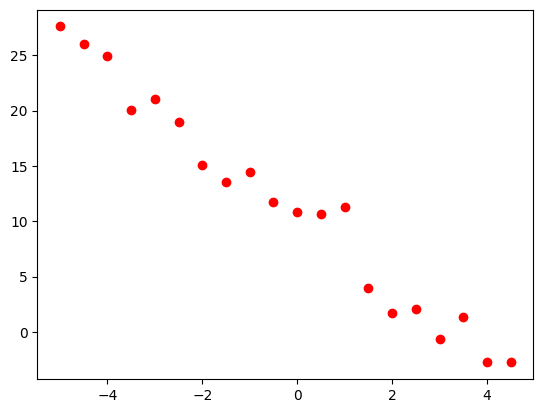

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Initializing points around the line y = -3*x + 10.
x = np.arange(-5, 5, 0.5)
n = len(x) # Số mẫu dữ liệu

std = 2 # The parameter indicates the degree of noise, where a larger value corresponds to more noise and a smaller value corresponds to less noise.
y = -3*x + 10 + np.random.normal(0, std, n)

# Visualize the data using red-colored circles.
plt.plot(x, y, 'ro')
plt.show()

## Step 4. Train the model with the sample data

Next, we will reinitialize the model to fit the generated sample data from the previous step. The architecture of the model must be compatible with the dimensions of the sample data.

In [8]:
lr = LinearRegression()

# Call the `build` method for the `lr` object and pass the corresponding input parameters
# for the training data generated in the above code block.
# According to you, what is the value of `input_dim`?

### YOUR CODE HERE
lr.build(1)
# To display the architecture of the model, you can call the `summary` method.
print("The architecture of the Linear Regression model: ")
lr.summary()

The architecture of the Linear Regression model: 
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the invocation of the `build` method.


In [9]:
# To train the model, we call the `train` method with the generated sample data.
# If the `build` step of the model is called correctly, the subsequent `train` step will be executed successfully.
hist = lr.train(x, y)

Epoch 1/30
1/1 [==============================] - 1s 962ms/step - loss: 189.8726
Epoch 2/30
1/1 [==============================] - 0s 15ms/step - loss: 108.8055
Epoch 3/30
1/1 [==============================] - 0s 21ms/step - loss: 64.3787
Epoch 4/30
1/1 [==============================] - 0s 17ms/step - loss: 39.3399
Epoch 5/30
1/1 [==============================] - 0s 34ms/step - loss: 24.8568
Epoch 6/30
1/1 [==============================] - 0s 23ms/step - loss: 16.2853
Epoch 7/30
1/1 [==============================] - 0s 15ms/step - loss: 11.1138
Epoch 8/30
1/1 [==============================] - 0s 27ms/step - loss: 7.9445
Epoch 9/30
1/1 [==============================] - 0s 16ms/step - loss: 5.9784
Epoch 10/30
1/1 [==============================] - 0s 36ms/step - loss: 4.7472
Epoch 11/30
1/1 [==============================] - 0s 17ms/step - loss: 3.9707
Epoch 12/30
1/1 [==============================] - 0s 21ms/step - loss: 3.4784
Epoch 13/30
1/1 [==============================] - 

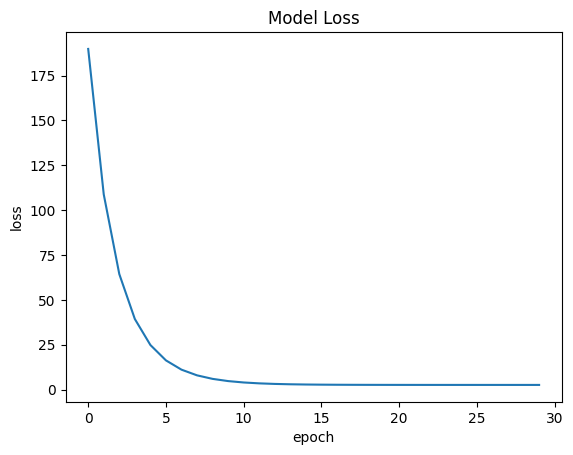

In [10]:
# Display the loss per epoch.
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [11]:
# After training, we save the model for future reuse.
# Note: The two methods `save`
# and `load` are used when you want to reuse the model multiple times WITHOUT THE NEED TO RETRAIN it.
lr.save('linear_regression_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Step 5. Visualizing the Model and Making Predictions with Test Data.

In [12]:
# Create a new object and call the method to load the model from a file.
pretrain_lr = LinearRegression()
pretrain_lr.load('linear_regression_model.h5')

In [13]:
theta = pretrain_lr.get_weights()
print('The optimal parameters: ')
print(theta)
bias = theta[1][0] # Bias is indeed represented as θ₀ in the original model.
theta1 = theta[0][0][0]
print('Where:')
print('   - bias (intercept): ', bias)
print('   - theta (coefficient for input data): ', theta1)

The optimal parameters: 
[array([[-3.237253]], dtype=float32), array([10.645681], dtype=float32)]
Where:
   - bias (intercept):  10.645681
   - theta (coefficient for input data):  -3.237253


As we can see, the optimized parameters approximate the original model's parameters that were used to generate the data:

`y = -3*x + 10 + np.random.normal(0, std, n)`

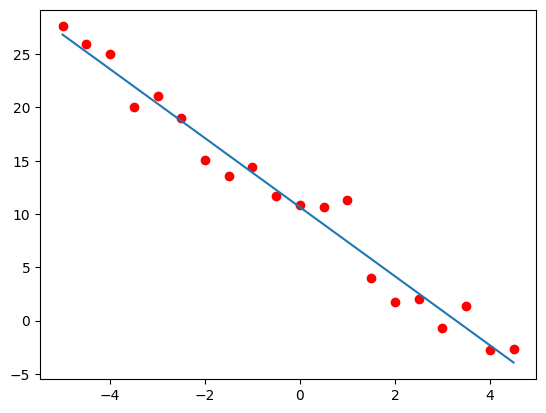

In [14]:
# Visualize the data and the trained model.
plt.plot(x, y, 'ro')

# Visualizing the model.
plt.plot([x[0],x[-1]], [theta1*x[0]+bias, theta1*x[-1]+bias])
plt.show()

Thus, we can see that the trained coefficients form a straight line equation that passes through the training data points.

Next, let's test the model with the x_test data for two cases: -4 and 0.

Based on the graph, we can infer that y_test will take values close to 20, approximately 10, and 0.

In [15]:
x_test = [-4, 0, 4]
y_pred = pretrain_lr.predict(x_test)

print("The values that the regression model predicts on x_test: ", x_test)
print(y_pred)

1/1 [==============================] - 0s 105ms/step
The values that the regression model predicts on x_test:  [-4, 0, 4]
[[23.594692 ]
 [10.645681 ]
 [-2.3033304]]


These values are quite consistent with the predicted values mentioned above.